# Analysis of Ad-Hoc Communications Network

Taiwei Lu (A53232127)

In this section we are going to simulate Ad-Hoc communication network with our trimming algorithm for handling overlaid coverage.<br>Specifications and assumptions for the simulations are:<br> 
- coverages from all communication towers take rectangular shape
- towers' coverage must be included in the overall footprint
- towers' locations and dimensions are to be determined by random uniform distribution
- later entered tower cannont have overlap with existing coverage 


<br>
How does the simulation work:
<br>
     With the function demo(n,dim), user can specify the dim * dim overall footprint with n communiction towers on it. Each 
<br>
tower'scoverage is represented by a rectangular shape with specific color. demo will plot one result before trimming where 
<br>
towers' coverages overlaid on each other and the other plot with trimmed result coverage of those n towers.<br> 
On both plots towers are represented by same color (previous plot with lighter color for visibility of overlapped area)

**Goal**: To maximize coverage area of any availiable communications tower

## Set up for demo

**1**.Set up the overall foot print using 0's and 1's array

**2**.Implement the Trimming algorithem to simulate communication towers
  - Trim overlapping coverage area
  - Search the remaining coverage area and find the rectangle with maximum width and height comnination possible
  - Only preserve this specific rectangle with maximum width and height and discard the remaning coverage area for added tower

  ## 1 and 2 are impelemented here (**To do: Run those function cells to set it up for later demo**)

In [21]:
def check_ones(corner_x, corner_y, height,width, grid):
    '''
    This function trims overlapped area it tooks the same input as trimming

    param: corner_x       type:int
    param: corner_y       type:int
    param: height         type:int
    param: width          type:int
    param: grid           type:list

    '''
    
    if len(grid) < corner_x+width or len(grid[0]) < corner_y+height:
        return False
    for i in range(corner_x, corner_x+width):
        for j in range(corner_y, corner_y+height):
            if grid[i][j] == 0:

                return False

    return True

def trimming(corner_x, corner_y, height,width, grid1,dim):
    '''
    This function trims overlapped area and then decide the resultant added rectangle

    param: corner_x       type:int
    param: corner_y       type:int
    param: height         type:int
    param: width          type:int
    param: grid           type:list
    param: dim            type:int
    
    '''
    assert isinstance(corner_x,int) and isinstance(corner_y,int) and isinstance(height,int) and isinstance(width,int),'invalid input'  
    assert isinstance(grid1,list) and isinstance(dim,int),'invalid input'
    assert corner_x>=0 and corner_y>=0 and height>=0 and width>=0 and dim>=0,'invalid input'
    
    grid2=[[0 for i in range(dim)] for x in range(dim)]
    for i in range(width):
        for j in range(height):
           
            if grid1[i+corner_x][j+corner_y] == 0:
                grid2[i+corner_x][j+corner_y] = 1
    max_x = 0
    max_y = 0
    max_height = 0
    max_width = 0
    max_area = 0
    for i in range(corner_x, corner_x+width):
        for j in range(corner_y, corner_y+height):
            if grid2[i][j] == 0:
                continue
            temp_height = 1
            temp_width = 1
            while(check_ones(i, j, temp_height, temp_width, grid2)):
                while(check_ones(i, j, temp_height, temp_width, grid2)):
                    if temp_height*temp_width>max_area:
                        max_x = i
                        max_y = j
                        max_height = temp_height
                        max_width = temp_width
                        max_area = temp_height*temp_width
                    temp_height += 1
                temp_width += 1
                temp_height = 1
    for i in range(max_x, max_x+max_width):
        for j in range(max_y, max_y+max_height): 
            grid1[i][j] = 1
    assert isinstance(max_x,int) and isinstance(max_y,int) and isinstance(height,int) and isinstance(width,int),'invalid trimming output type'
    assert max_x>=0 and max_y>=0 and width>=0 and height>=0, 'invalid trimming output' 
    return max_x,max_y,max_height,max_width
                        

# Plotting Functions

**3**. After we have the algorithm to simulate how Ad-Hoc Network we need to plot corresponding rectangles for visualization
- Use user input _dim_ (dimension of the overall desired coverage foot print) and _n_ (# of towers)
- Displays an overlapping plot befire trimming and a trimmed plot as result coverage

* trimming_demo uses preset rectangles and tower number to check if trimming function works as we expcted 
  <br>
  Location and dimension of those preset rectangles(lowerleft_x, lower_left_y, width, height):<br> blue(3,1,3,3) <br> red(2,2,3,4) <br> yellow(4,3,4,4)

##  3 is implemented below (To do: Run the functions below)

In [22]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from numpy import *

In [23]:
def draw(n,dim):
    '''
    This function plot the n-th tower situation before trimming taking place
    It also returns trimmed rectangle location and dimention along with color information


    param: n                   type:int
    param: dim                 type:int    
    
    '''
    assert isinstance(n,int) and isinstance(dim,int) and n>=0 and dim>=0, 'invalid drawing input'
    lims = (0, dim)
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
   
    a,b,c,d=[],[],[],[] 
    c1,c2,c3=[],[],[]

    pat=[]
    grid1=[[0 for grid1_i in range(dim)] for grid1_j in range(dim)]
    for i in range(n):
    
    
      
        x,y=random.randint(dim),random.randint(dim)
        
        height,width=random.randint(dim-y)+1,random.randint(dim-x)+1
        
        
        q,w,e,r=trimming(x, y, height,width,grid1,dim) 
                                                                
        a.append(q);b.append(w);c.append(e);d.append(r)                       
        
        c11=random.random();c22=random.random();c33=random.random()
        temp=patches.Rectangle(
            (x,y),   # (x,y)
            width,          # width
            height,          # height
            facecolor=(c11,c22,c33),
            edgecolor='black',
            alpha=0.4,      
            linewidth=3
        )
        pat.append(temp)
        c1.append(c11);c2.append(c22);c3.append(c33)
        
    for p in pat:
        ax.add_patch(p)
 

    plt.ylim(lims)
    plt.xlim(lims)
                                                                
    return a,b,c,d,c1,c2,c3                                                  

In [24]:
def ddraw(n,dim,a,b,c,d,c1,c2,c3):
    '''
    This function takes input from draw function to plot trimmed and processed resultant coverage
    
    param: n                 type:int
    param: dim               type:int    
    
    input from draw function:
    param: a                 type:int
    param: b                 type:int    
    param: c                 type:int
    param: d                 type:int      
    param: c1                type:int
    param: c2                type:int
    param: c3                type:int
    
    '''
    assert isinstance(n,int) and n>=0 and isinstance(dim,int) and dim>=0, 'invalid input for ddraw'
    
    lims = (0, dim)
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
   
    

    
    for i in range(n):
        if d[i]==0 or c[i]==0:
            continue
        
        temp=patches.Rectangle(
            (a[i],b[i]),   # (x,y)
            d[i],          # width
            c[i],          # height
            facecolor=(c1[i],c2[i],c3[i]),
            edgecolor='black',
            linewidth=3,
        )
        ax.add_patch(temp)
    
    
 

    plt.ylim(lims)
    plt.xlim(lims)

In [25]:
def trimming_demo():
    '''
    This function plot preset rectangles(lowerleft_x,lowerleft_y,width,height):
    blue(3,1,3,3) red(2,2,3,4)  yellow(4,3,4,4)
    and shows how trimming works
    
    prama:(none)
    
    '''
    
    
    
    lims = (0, 10)
    fig = plt.figure()
    ax = fig.add_subplot(111, aspect='equal')
    rectangle=[[3,1,3,3],[2,2,4,3]]
    a,b,c,d=[],[],[],[]
    for pp in [patches.Rectangle(
            (rectangle[0][0],rectangle[0][1]),   # (x,y)
            rectangle[0][3],         # width
            rectangle[0][2],      # height
            facecolor='blue',
            edgecolor='black',
            linewidth=3,
            alpha=0.6       ),
               patches.Rectangle(
            (rectangle[1][0],rectangle[1][1]),   # (x,y)
            rectangle[1][3],         # width
            rectangle[1][2],       # height
            facecolor='red',
            edgecolor='black',
            linewidth=3,
            alpha=0.6      
        )]:
        ax.add_patch(pp)
    plt.ylim(lims)
    plt.xlim(lims)
    plt.title('Oerlapping Senario1 (blue enters first)')
#================================================================================================================================
    grid1=[[0 for grid1_i in range(10)] for grid1_j in range(10)]
    for l in range(len(rectangle)):
        
            q,w,e,r=trimming(rectangle[l][0], rectangle[l][1],rectangle[l][2],rectangle[l][3],grid1,10)
            a.append(q);b.append(w);c.append(e);d.append(r)
    
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111, aspect='equal')
   
    
    for pp in [patches.Rectangle(
            (a[0],b[0]),   # (x,y)
            d[0],         # width
            c[0],      # height
            facecolor='blue',
            edgecolor='black',
            linewidth=3,
                   ),
               patches.Rectangle(
            (a[1],b[1]),   # (x,y)
            d[1],         # width
            c[1],      # height
            facecolor='red',
            edgecolor='black',
            linewidth=3,
                  
        )]:
        ax1.add_patch(pp)
    plt.ylim(lims)
    plt.xlim(lims)
    plt.title('Oerlapping Senario1 After Trimming')
#===============================================================================================================================    
    grid1=[[0 for grid1_i in range(10)] for grid1_j in range(10)]
    for l in range(len(rectangle)):
        
            q,w,e,r=trimming(rectangle[l][0], rectangle[l][1],rectangle[l][2],rectangle[l][3],grid1,10)
            a.append(q);b.append(w);c.append(e);d.append(r)
    
    fig2= plt.figure()
    ax2= fig2.add_subplot(111, aspect='equal')
   
    
    for pp in [patches.Rectangle(
            (a[0],b[0]),   # (x,y)
            d[0],         # width
            c[0],      # height
            facecolor='blue',
            edgecolor='black',
            linewidth=3,
            alpha=0.6     ),
               patches.Rectangle(
            (a[1],b[1]),   # (x,y)
            d[1],         # width
            c[1],      # height
            facecolor='red',
            edgecolor='black',
            linewidth=3,alpha=0.6),
                   patches.Rectangle(
            (4,3),   # (x,y)
            4,         # width
            4,      # height
            facecolor='yellow',
            edgecolor='black',
            linewidth=3,
            alpha=0.6              
        )]:
        ax2.add_patch(pp)
    plt.ylim(lims)
    plt.xlim(lims)
    plt.title('Oerlapping Senario2 yellow enters')
    rectangle.append([4,3,4,4])
#===============================================================================================================================
    grid1=[[0 for grid1_i in range(10)] for grid1_j in range(10)]
    a,b,c,d=[],[],[],[]
    for l in range(len(rectangle)):
        
            q,w,e,r=trimming(rectangle[l][0], rectangle[l][1],rectangle[l][2],rectangle[l][3],grid1,10)
           
            a.append(q);b.append(w);c.append(e);d.append(r)
            
            
    fig3 = plt.figure()
    ax3 = fig3.add_subplot(111, aspect='equal')
   
    
    for pp in [patches.Rectangle(
            (a[0],b[0]),   # (x,y)
            d[0],         # width
            c[0],      # height
            facecolor='blue',
            edgecolor ='black',
            linewidth=3,
            alpha=0.6
                   ),
               patches.Rectangle(
            (a[1],b[1]),   # (x,y)
            d[1],         # width
            c[1],      # height
            facecolor='red',
            edgecolor ='black',
            linewidth=3,
            alpha=0.6)
                   ,
               patches.Rectangle(
            (a[2],b[2]),   # (x,y)
            c[2],         # width
            d[2],      # height
            facecolor='yellow',
            edgecolor ='black',
            linewidth=3,
            alpha=0.6
                   )
                  
        ]:
        ax3.add_patch(pp)
    plt.ylim(lims)
    plt.xlim(lims)
    plt.title('Oerlapping Senario2 yellow trimmed')

# Demo Functions 

**4**. After the stage is set up we can then integrate functions together and implement functions for visulization. <br>**demo** takes n towers and dimensions of desired foot print as parmeters and returns resulted coverage as well as the percentage related to desired overall footprint.<br> **fill_up demo** shows the break down of the filling up a desired foot print by keeping adding towers.<br> For a 10 x 10 foot print, **area_count**  takes in a sample size and returns the average number of communication towers needed to reach total coverage of the desired foot print. 

## 4 is implemented below (To do: run functions below)

In [26]:
def demo(n,dim):
    '''
    This function demos the resultant coverage of n towers in a dim x dim overall footprint
    
    param: n                type:int
    param: dim              type:int
    
    
    '''
    assert isinstance(n,int) and n>=0 and isinstance(dim,int) and dim>=0, 'invalid input for demo'
    
    a,b,c,d,c1,c2,c3=draw(n,dim)
    plt.title('Overlapping Coverage')
    ddraw(n,dim,a,b,c,d,c1,c2,c3)
    plt.title('Adjusted Coverage')
    area=sum([i*j for i,j in zip(c,d)])
    assert isinstance(1.0*area/dim/dim,float) and 1.0*area/dim/dim<=1 and 1.0*area/dim/dim>=0, 'invalid percentage'
    return 1.0*area/dim/dim


In [27]:
def fill_up_demo():
    '''
    This function demos the process of reaching full coverage by adding towers
    param:none
    
    
    '''
    
    
    itter=1
    while itter <=  150:
        coverage=demo(itter,10)

        itter+=1
        if coverage>=1:
            break
            
        

In [28]:
def area_1(n,dim):
    '''
    this function returns the coverage percentage from n towers in a dim x dim overall footprint
    param: n                type:int
    param: dim              type:int
    
    
    '''
    assert isinstance(n,int) and n>=0 and isinstance(dim,int) and dim>=0, 'invalid input for area_1'
   
    a,b,c,d=[],[],[],[] 
    grid1=[[0 for grid1_i in range(dim)] for grid1_j in range(dim)]
    for i in range(n):
    
    
      
        x,y=random.randint(dim),random.randint(dim)
        
        height,width=random.randint(dim-y)+1,random.randint(dim-x)+1
        
        
        q,w,e,r=trimming(x, y, height,width,grid1,dim) 
                                                                
        a.append(q);b.append(w);c.append(e);d.append(r)                       
        
    area=sum([i*j for i,j in zip(c,d)])
    percentage = 1.0*area/dim/dim    
    assert isinstance(percentage,float) and percentage<=1 and 1.0*percentage>=0, 'invalid percentage'
    return percentage

In [29]:
def area_count(sample_size):
    '''
    This function returns the averaged number of towers for full coverage with specific sample_size
    param: sample_size       type: int
    
    '''
    assert isinstance(sample_size,int) and sample_size>0, 'invalid input for area_count'
    
    
    itt=[]
    for k in range(sample_size):
        
        iteration=1
        while iteration <= 150:
        
            percentage=area_1(iteration,10)
            iteration+=1
            if percentage>=1:
                break
    
        itt.append(iteration)
    return reduce(lambda x, y: x + y, itt) / len(itt)    
    
    

# Demo Session

Try out the functions described in **4** <br>
for **demo** and **area_count** change input parameters for different senario

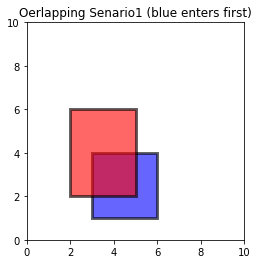

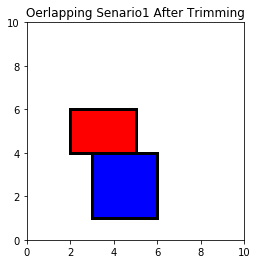

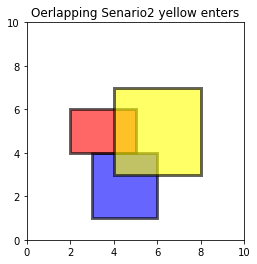

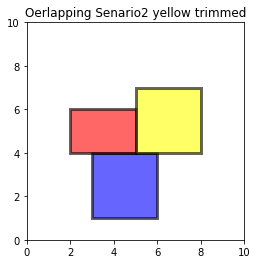

In [30]:
trimming_demo()

**demo(number of towers, dimension of desired foot print) recommend:(5,10) _note:coverage percentage also returned_** <br>_heads up: two inputa can be any positive integer but the larger the scale the slower the computationa time._

0.5599999999999999

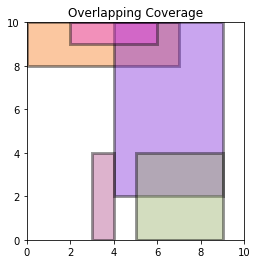

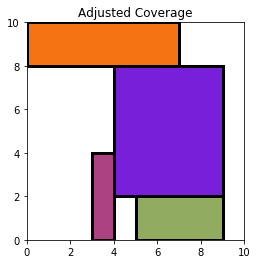

In [31]:
demo(5,10)
     

**area_count(samples size) reccomend:(50)** <br> _heads up: this function takes any positive integers but larger samples size requires more computational time_ 

In [32]:
print area_count(50)

59


**fill_up_demo() shows the process of trying n towers till reach a 10 x 10 foot print full coverage**<br>_heads up: due to graphical computation this function takes a little bit while to run._

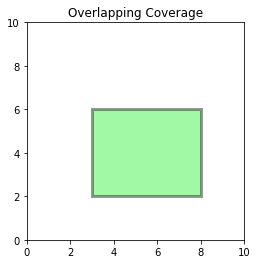

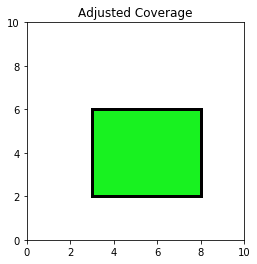

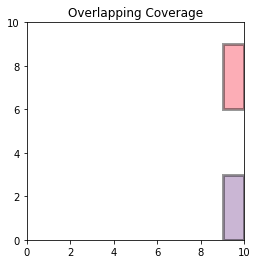

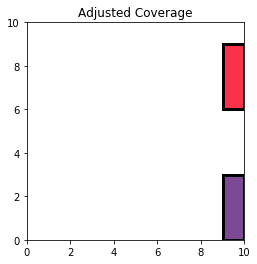

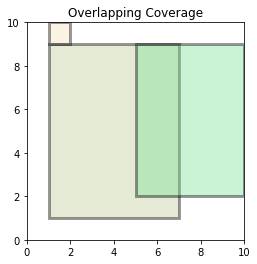

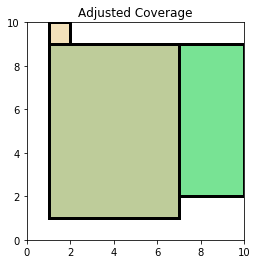

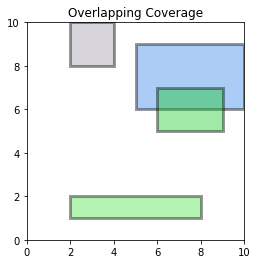

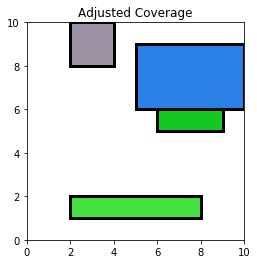

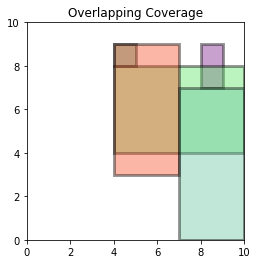

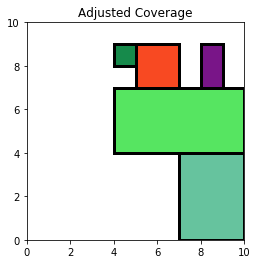

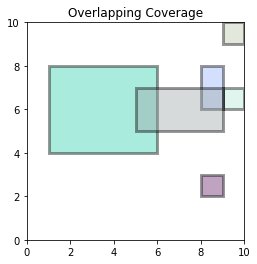

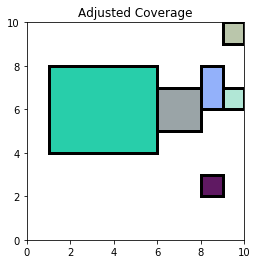

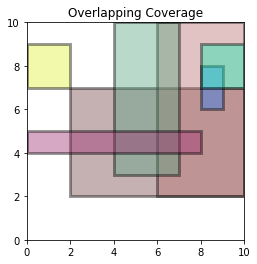

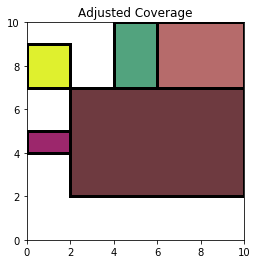

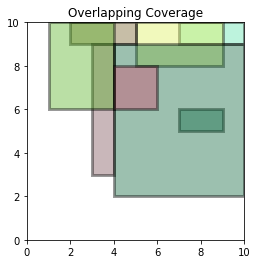

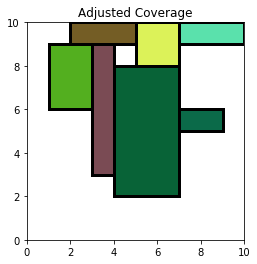

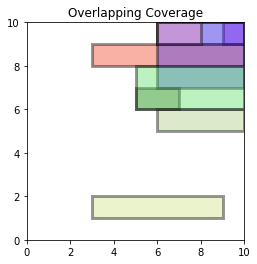

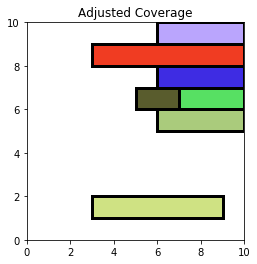

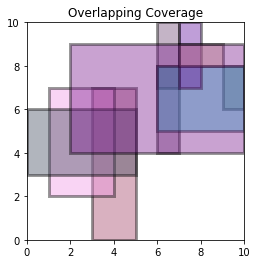

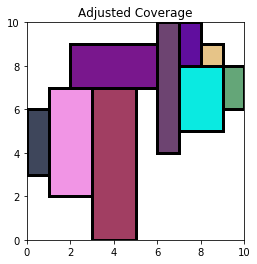

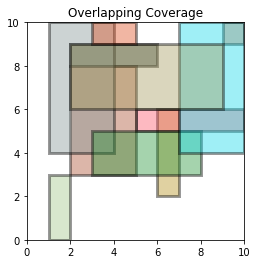

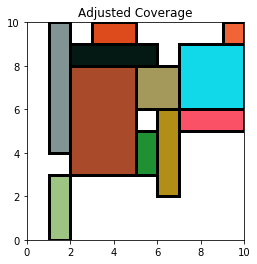

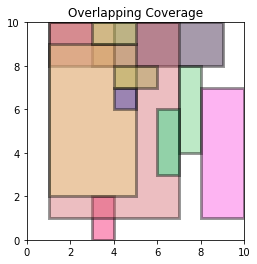

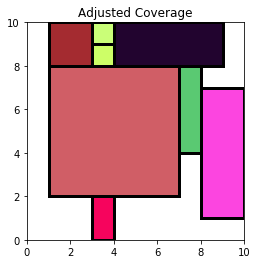

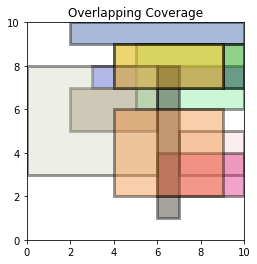

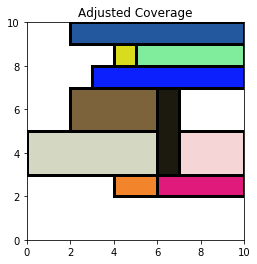

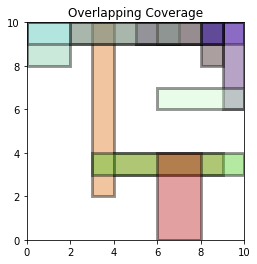

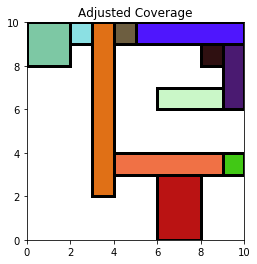

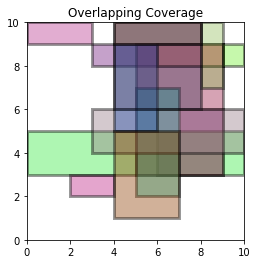

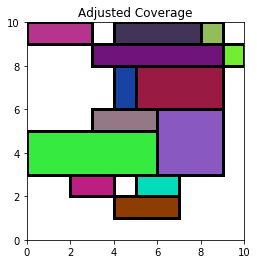

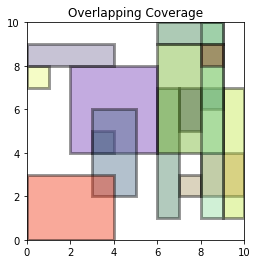

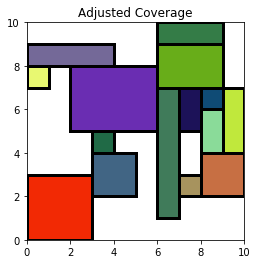

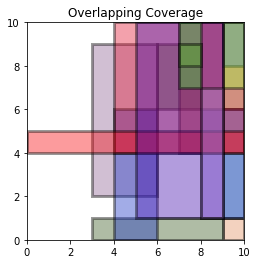

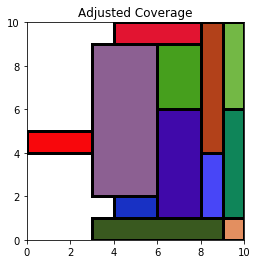

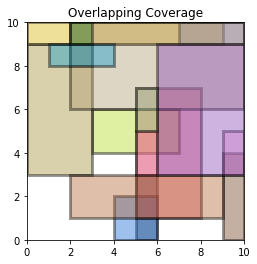

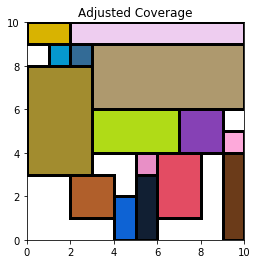

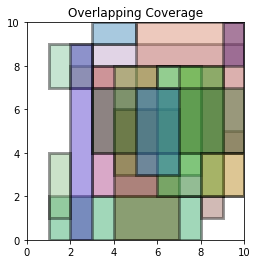

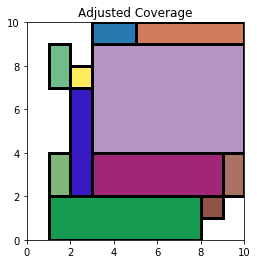

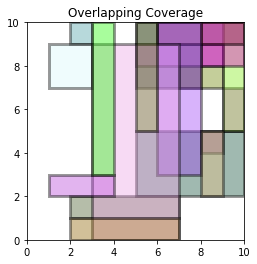

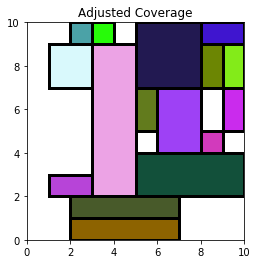

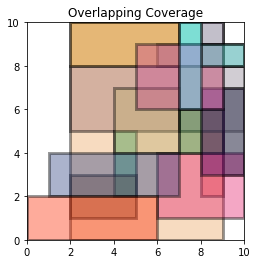

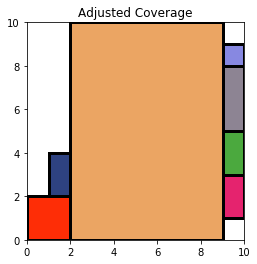

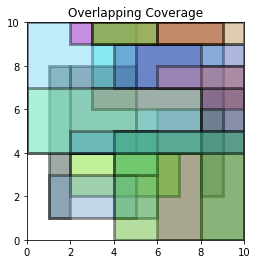

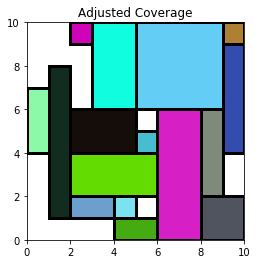

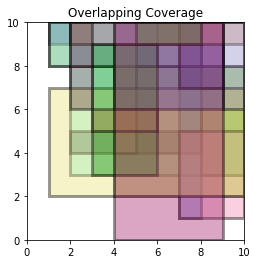

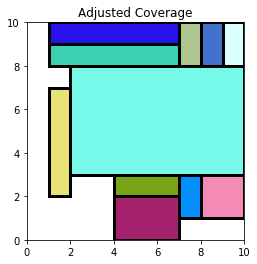

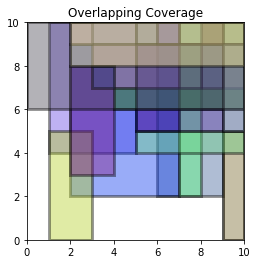

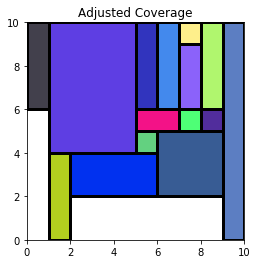

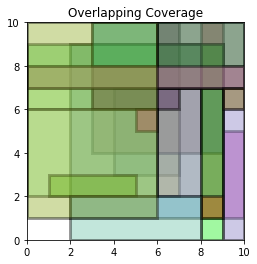

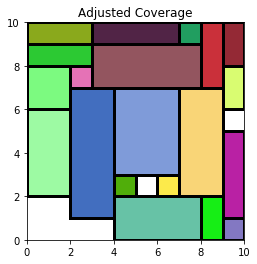

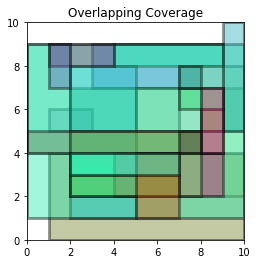

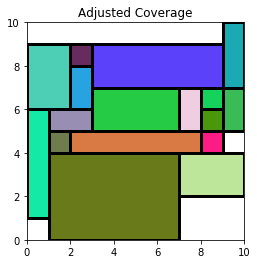

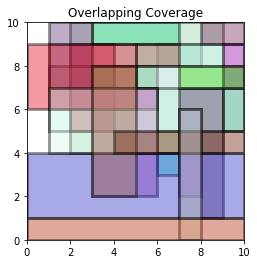

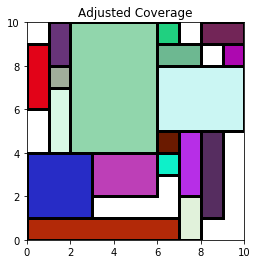

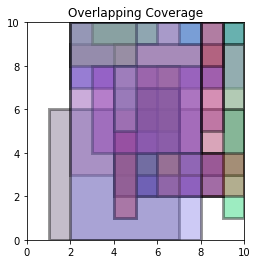

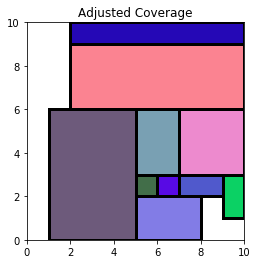

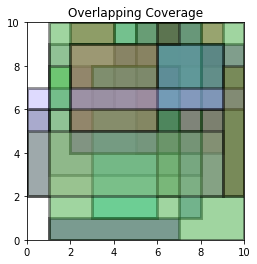

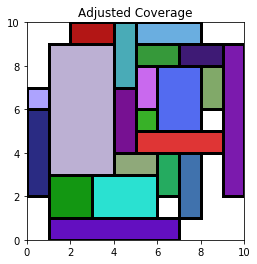

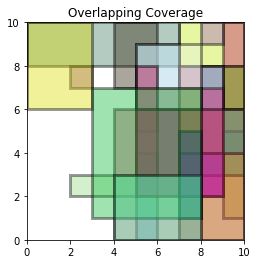

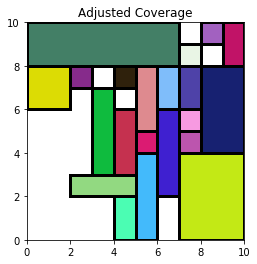

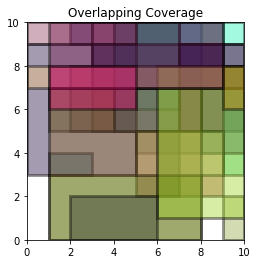

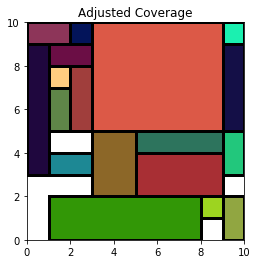

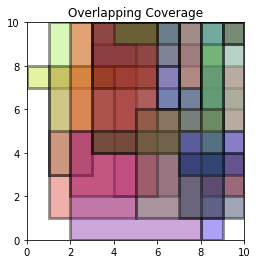

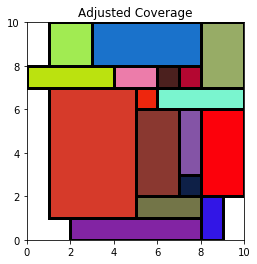

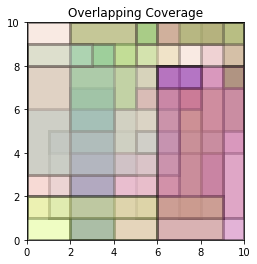

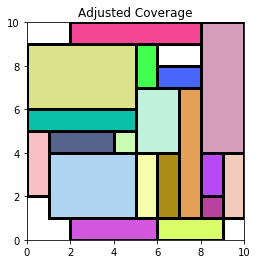

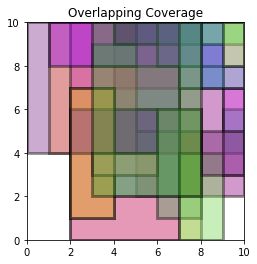

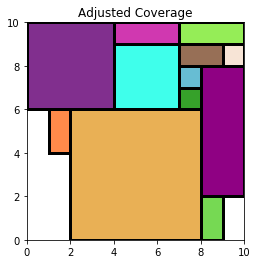

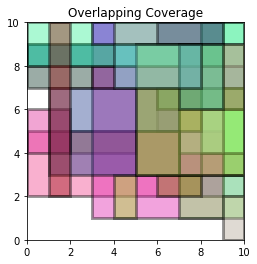

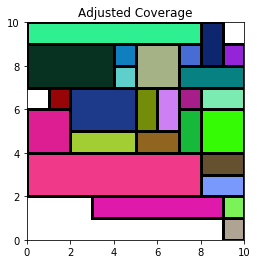

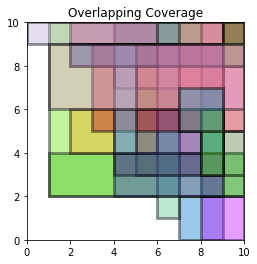

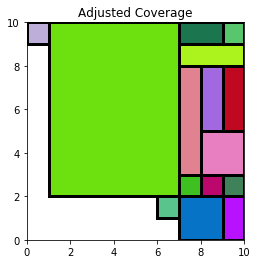

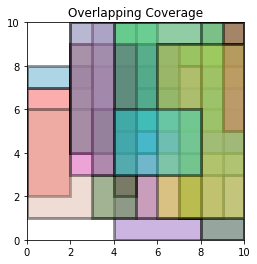

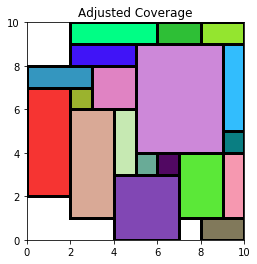

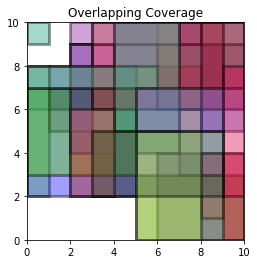

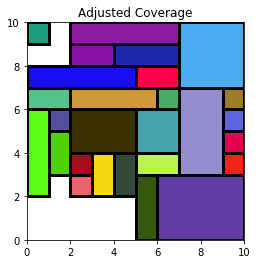

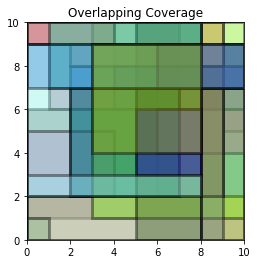

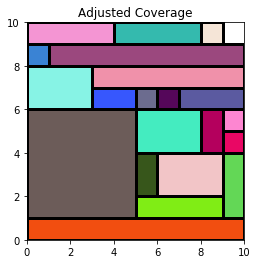

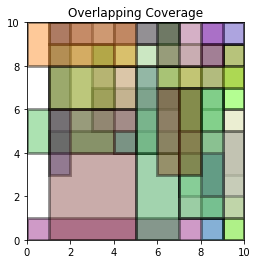

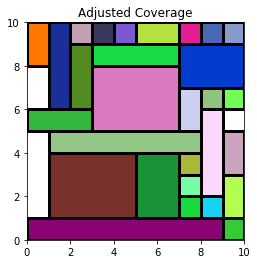

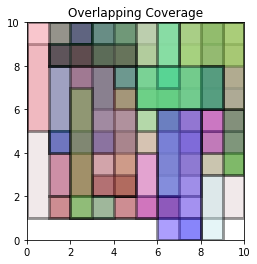

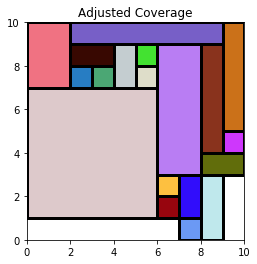

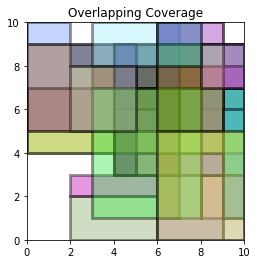

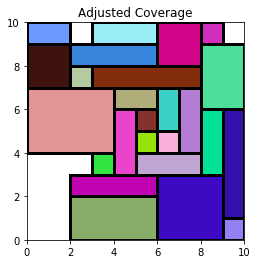

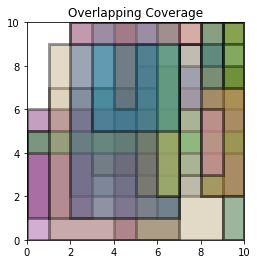

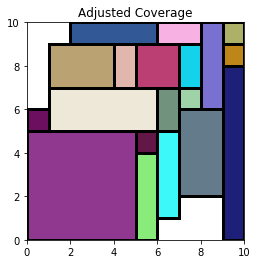

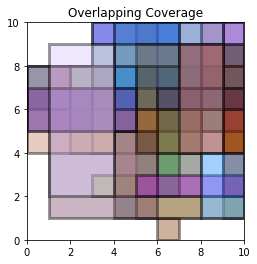

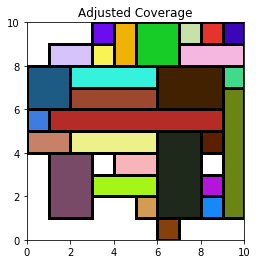

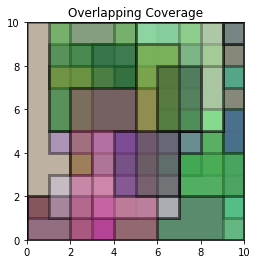

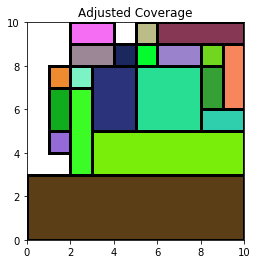

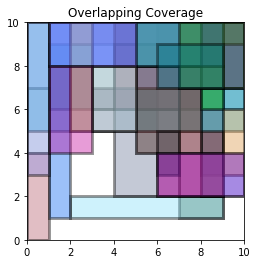

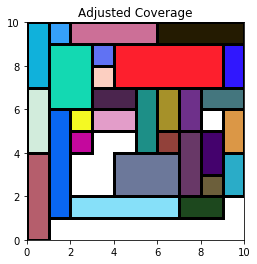

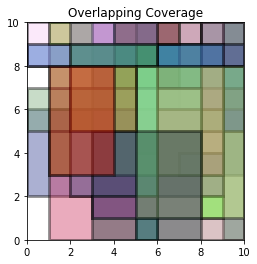

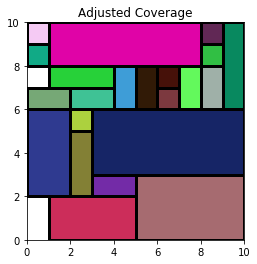

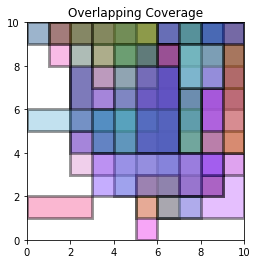

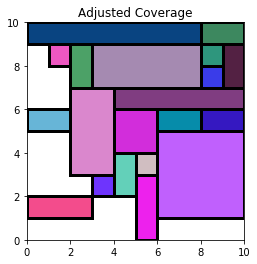

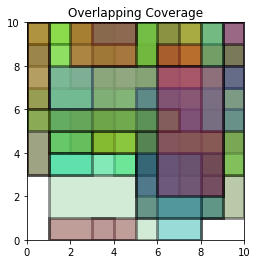

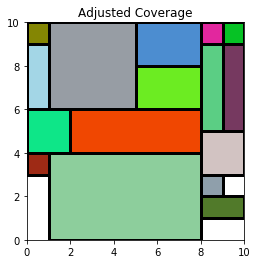

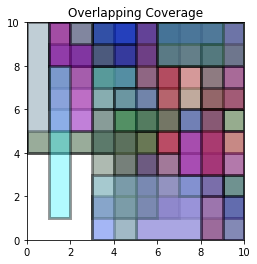

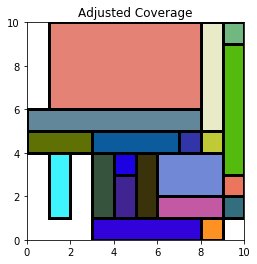

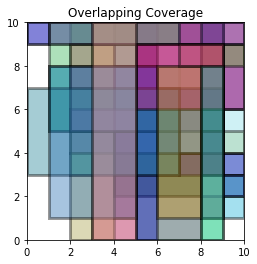

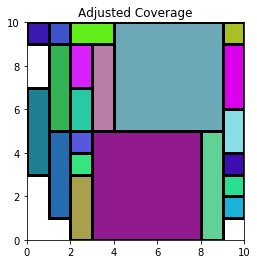

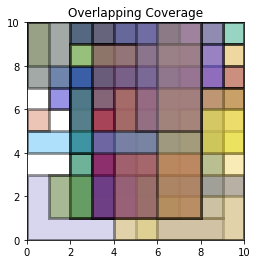

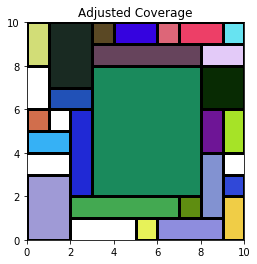

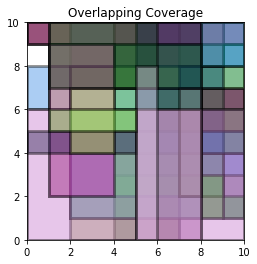

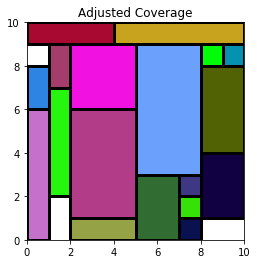

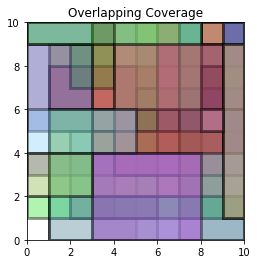

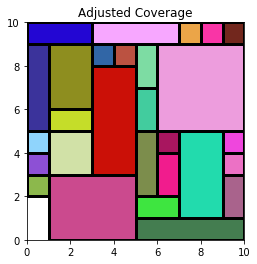

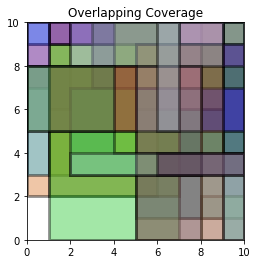

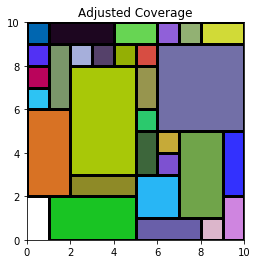

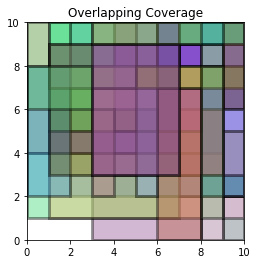

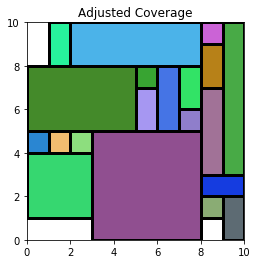

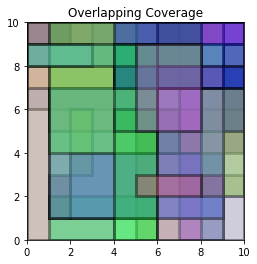

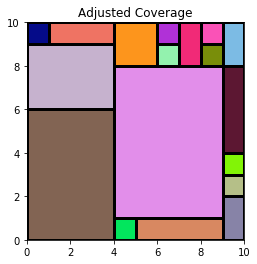

In [33]:
fill_up_demo()

## Analysis

    
- Due to the nature of ad-Hoc communication network, the coverage of each tower is unreliable. Thus there is no need for us to preallocate the positions of each tower. We tackle this problem by setting the location and dimension of rectangles as uniform distributed numbers.
- Also because of the unreliability of ad-Hoc towers we cannot assume we have pre-knowledge of the location of the coverage, so our simulation must be done with assuming we have n towers availiable and turn on the towers in a sequential order instead of throw in one tower at a time see when we will reach full coverage. The later method only works for one time since the text time the tower will have different coverage. **(This assumption is important)**
- ad-Hoc communication network also havs cross talking issues which means the later entered tower cannot have overlapped coverage with preexisting coverage. Intuitively we can represent the resultant coverage by trimming off overlapped region, but as the single tower only provides symmetrical coverage(rectangular in this case) we will need to do further trimming to only yield the largest non overlapping rectangle.
## This leave us with the question: how many towers we will need to provide full coverage for a desired dim x dim footprint?<br>
As we have already set up the simulation environment, we can simply call __area_count(sample_size)__ to test out how many towers on average is needed for full coverage of overall footprint. Here are some sample outputs(sample_size=50):<br> 57, 58, 54, 54, 57, 56, 58, 53, 59, 57 ,avg=56.3<br> This gives us an insight that for a 10 x 10 overall footprint which has **area=100**, we will need approximately **57 communication towers** to reach a full coverage of the footprint. We can also assume that if we want to have guaranteed **full coverage**, **60** towers for area=100 will be a good choice. 

  

## A general solution that we proposed from our analysis
- for an dim x dim area if we want to reach full coverage with ad-Hoc network. a tower number equals dim x dim x 60% is suggested to throw in. 

## Some Trade-offs

- In reality ad-Hoc network does not generate rectangular shaped coverage, we assume it is rectangular for the ease of computation. 
- For the ease of saving computational time, we only choose a 10 x 10 foot print as our desired overall coverage for testing out average number of tower for full coverage ,which can compromise the generalization of our conclusion. 
- We only tried 50 x 10 samples of average number of towers for full coverage, larger sample size can improve the credibility of our conclusion but require more computational time.

